In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import h2o
from h2o.automl import H2OAutoML
h2o.init()

def get_ECFP4(row):
    return AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(row), 4, nBits=2048).ToList()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "16.0.2" 2021-07-20; OpenJDK Runtime Environment Homebrew (build 16.0.2+0); OpenJDK 64-Bit Server VM Homebrew (build 16.0.2+0, mixed mode, sharing)
  Starting server from /Users/ogurb/miniconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/n5/wrds_wts3jq42tqpd0mjn2mr0000gn/T/tmp_4saxjou
  JVM stdout: /var/folders/n5/wrds_wts3jq42tqpd0mjn2mr0000gn/T/tmp_4saxjou/h2o_ogurb_started_from_python.out
  JVM stderr: /var/folders/n5/wrds_wts3jq42tqpd0mjn2mr0000gn/T/tmp_4saxjou/h2o_ogurb_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Kiev
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_ogurb_o5232u
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


In [2]:
clf_aml = h2o.load_model("trained_models/h2o_clf.best/StackedEnsemble_AllModels_3_AutoML_1_20220315_102704")

In [21]:
clf_aml.leaderboard

AttributeError: type object 'ModelBase' has no attribute 'leaderboard'

# Classification

In [2]:
clf_df = pd.read_csv('bin_clf_dataset.csv')

clf_df['ECFP4'] = clf_df.SMILES.apply(get_ECFP4)
df = pd.DataFrame(clf_df['ECFP4'].to_list())
df['active'] = clf_df['active']
df = df.set_index(clf_df['SMILES'])
df.columns = list(map(str, df.columns))
df.to_csv('bin_clf_dataset_ECFP4.csv', index=False)

print(df.shape)
df.head(2)

(26808, 2049)


,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,active
SMILES,,,,,,,,,,,,,,,,,,,,,
CS(=O)(=O)N1CCN(C(=O)C(Cc2cccc(C(N)=[NH2+])c2)NS(=O)(=O)c2cccc3ccccc23)CC1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
NC(=[NH2+])N1CCC(CC(=O)C2Cc3cccc4c3N2C(=O)C(NS(=O)(=O)c2ccc3c(c2)CCO3)CC4)CC1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
df2 = pd.read_csv('bin_clf_dataset_ECFP4.csv')
print(df2.shape)
df2.head(2)

(26808, 2049)


,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,active
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
myString = ' '
if not myString.strip():
    print('empty')

empty


In [22]:
df = h2o.import_file('bin_clf_dataset_ECFP4.csv', header=1)

print(df.shape)
print(df.columns[:5], df.columns[-5:])
df.head(2)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
(26808, 2049)
['0', '1', '2', '3', '4'] ['2044', '2045', '2046', '2047', 'active']


0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [24]:
%%time

y = "active"
x = list(df.columns)
x.remove(y)
df[y] = df[y].asfactor()

aml = H2OAutoML(nfolds=5,
                balance_classes=True,
                max_runtime_secs_per_model=180,
                stopping_rounds=10,
                keep_cross_validation_fold_assignment=True,
                seed =1)
aml.train(x=x,
          y="active",
          training_frame=df)

model_path = h2o.save_model(model=aml,
                            path="trained_models/h2o_clf.best",
                            force=True)
print(f'The best model was saved: {model_path}')

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


H2OTypeError: Argument `model` should be a ModelBase, got H2OAutoML <h2o.automl._estimator.H2OAutoML object at 0x1670de0a0>

In [25]:
lb = aml.leaderboard
lb.head(5)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_3_AutoML_2_20220319_231657,0.998058,0.033758,0.98718,0.0178501,0.0967604,0.00936257
StackedEnsemble_AllModels_2_AutoML_2_20220319_231657,0.998032,0.0337644,0.986879,0.0204202,0.0962966,0.00927303
XGBoost_2_AutoML_2_20220319_231657,0.997952,0.0398195,0.986213,0.0220164,0.10218,0.0104408
StackedEnsemble_AllModels_1_AutoML_2_20220319_231657,0.997936,0.0342121,0.986749,0.0198145,0.0973033,0.00946793
StackedEnsemble_BestOfFamily_3_AutoML_2_20220319_231657,0.997932,0.0349734,0.986726,0.0201819,0.0978946,0.00958336


/Users/ogurb/miniconda3/lib/python3.8/site-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


AttributeError: 'Line2D' object has no attribute '_legmarker'

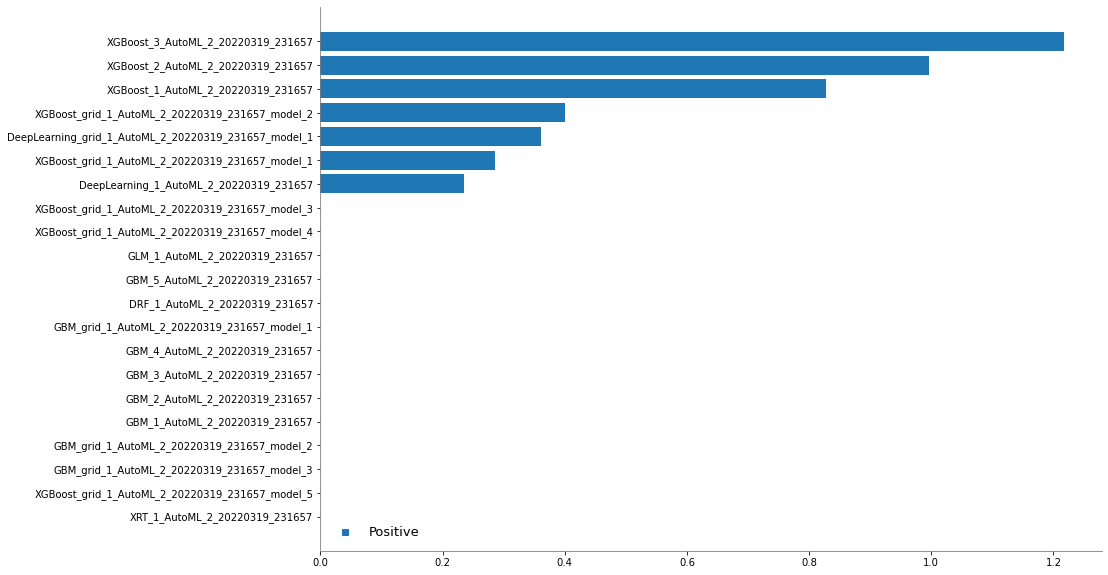

In [27]:

# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])
metalearner.std_coef_plot()

In [28]:
metalearner.coef()

{'Intercept': -0.6817130732524957,
 'XGBoost_2_AutoML_2_20220319_231657': 0.19992872709190296,
 'XGBoost_grid_1_AutoML_2_20220319_231657_model_1': 0.06657894927684407,
 'XGBoost_3_AutoML_2_20220319_231657': 0.23156108557814709,
 'XGBoost_grid_1_AutoML_2_20220319_231657_model_2': 0.08751340510657078,
 'XGBoost_1_AutoML_2_20220319_231657': 0.1641342265381297,
 'XGBoost_grid_1_AutoML_2_20220319_231657_model_3': 0.0,
 'XGBoost_grid_1_AutoML_2_20220319_231657_model_4': 0.0,
 'GLM_1_AutoML_2_20220319_231657': 0.0,
 'GBM_5_AutoML_2_20220319_231657': 0.0,
 'DRF_1_AutoML_2_20220319_231657': 0.0,
 'GBM_grid_1_AutoML_2_20220319_231657_model_1': 0.0,
 'GBM_4_AutoML_2_20220319_231657': 0.0,
 'GBM_3_AutoML_2_20220319_231657': 0.0,
 'GBM_2_AutoML_2_20220319_231657': 0.0,
 'GBM_1_AutoML_2_20220319_231657': 0.0,
 'DeepLearning_grid_1_AutoML_2_20220319_231657_model_1': 0.02890562230129885,
 'GBM_grid_1_AutoML_2_20220319_231657_model_2': 0.0,
 'GBM_grid_1_AutoML_2_20220319_231657_model_3': 0.0,
 'DeepLea

In [29]:
metalearner._model_json['output']['coefficients_table']


Coefficients: glm coefficients


,names,coefficients,standardized_coefficients
0,Intercept,-0.681713,-5.836392
1,XGBoost_2_AutoML_2_20220319_231657,0.199929,0.996290
2,XGBoost_grid_1_AutoML_2_20220319_231657_model_1,0.066579,0.286282
3,XGBoost_3_AutoML_2_20220319_231657,0.231561,1.218019
4,XGBoost_grid_1_AutoML_2_20220319_231657_model_2,0.087513,0.399600
5,XGBoost_1_AutoML_2_20220319_231657,0.164134,0.827449
6,XGBoost_grid_1_AutoML_2_20220319_231657_model_3,0.000000,0.000000
7,XGBoost_grid_1_AutoML_2_20220319_231657_model_4,0.000000,0.000000
8,GLM_1_AutoML_2_20220319_231657,0.000000,0.000000
9,GBM_5_AutoML_2_20220319_231657,0.000000,0.000000



See the whole table with table.as_data_frame()


In [32]:
metalearner._model_json['output']


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 0.007765 )",21,7,7,levelone_training_StackedEnsemble_AllModels_3_AutoML_2_20220319_23...



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_xval,deviance_se,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-03-20 00:16:27,0.000 sec,5,910.703081,0.037068,0.5,0.007765,0.067943,0.068485,0.030692,0.096412,0.033971,0.919381,0.998160,0.987356,7.519776,0.012347
1,,2022-03-20 00:16:27,0.648 sec,7,906.793488,0.039585,1.0,0.007765,0.067651,0.067542,0.030284,0.096438,0.033487,0.919337,0.998155,0.987373,7.519776,0.012347



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_test,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-03-20 00:16:18,0.000 sec,5,722.329038,0.030001,0.5,0.007765,0.067306,0.071180,...,0.987596,7.434707,0.012253,0.097449,0.035590,0.914274,0.997062,0.985601,7.882006,0.01104
1,,2022-03-20 00:16:19,0.876 sec,7,721.716950,0.032533,1.0,0.007765,0.067249,0.070593,...,0.987727,7.434707,0.012206,0.097416,0.035297,0.914332,0.997064,0.985547,7.882006,0.01104



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_test,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-03-20 00:16:20,0.000 sec,5,712.635509,0.029655,0.5,0.007765,0.066292,0.074992,...,0.987806,7.589128,0.011721,0.103162,0.037496,0.910483,0.998087,0.985805,7.251366,0.012999
1,,2022-03-20 00:16:21,0.872 sec,7,711.267043,0.032152,1.0,0.007765,0.066164,0.074605,...,0.987817,7.589128,0.011628,0.103498,0.037302,0.909899,0.998091,0.985795,7.251366,0.013188



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_test,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-03-20 00:16:22,0.000 sec,5,740.566992,0.030637,0.5,0.007765,0.069209,0.064844,...,0.986787,7.517035,0.012476,0.093532,0.032422,0.924032,0.998494,0.989310,7.530641,0.011097
1,,2022-03-20 00:16:23,1.010 sec,7,739.772327,0.033125,1.0,0.007765,0.069134,0.063517,...,0.986930,7.517035,0.012523,0.093328,0.031759,0.924363,0.998501,0.989344,7.530641,0.010912



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_test,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-03-20 00:16:23,0.000 sec,5,739.986383,0.030632,0.5,0.007765,0.069045,0.065102,...,0.987059,7.555516,0.012363,0.093791,0.032551,0.924900,0.998196,0.988228,7.380495,0.011539
1,,2022-03-20 00:16:24,0.774 sec,7,739.528683,0.033113,1.0,0.007765,0.069002,0.063927,...,0.987046,7.555516,0.012270,0.093894,0.031964,0.924734,0.998213,0.988306,7.380495,0.011353



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_test,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-03-20 00:16:24,0.000 sec,5,736.449263,0.030512,0.5,0.007765,0.068724,0.066308,...,0.987344,7.504202,0.012178,0.095534,0.033154,0.920283,0.998365,0.987229,7.582511,0.011347
1,,2022-03-20 00:16:25,1.086 sec,7,736.126459,0.032990,1.0,0.007765,0.068694,0.065066,...,0.987375,7.504202,0.012411,0.095426,0.032533,0.920464,0.998370,0.987231,7.582511,0.011347



Node Information: 


,,node,h2o,healthy,last_ping,num_cpus,sys_load,mem_value_size,free_mem,pojo_mem,...,rpcs_active,nthreads,is_leader,total_mem,max_mem,java_version,jvm_launch_parameters,os_version,machine_physical_mem,machine_locale
0,,0,127.0.0.1:54321,true,1647728176961,10,24.144043,140267932.0,3.729477e+09,425222094.0,..., ,10,true,4.091544e+09,4.294967e+09,Java 16.0.2 (from Homebrew),[-ea],Mac OS X 12.3 (x86_64),1.717987e+10,en_UA



Cluster Configuration: 


,,h2o_cluster_uptime,h2o_cluster_timezone,h2o_data_parsing_timezone,h2o_cluster_version,h2o_cluster_version_age,h2o_cluster_name,h2o_cluster_total_nodes,h2o_cluster_free_memory,h2o_cluster_total_cores,h2o_cluster_allowed_cores,h2o_cluster_status,h2o_internal_security,h2o_api_extensions
0,,6404929.0,Europe/Kiev,UTC,3.36.0.3,1 month and 3 days,H2O_from_python_ogurb_o5232u,1,3.729477e+09,10,10,"locked, healthly",false,"Amazon S3, XGBoost, Algos, Infogram, AutoML, Core V3, TargetEncode..."



Input Frames Information: 


,,input_frame,checksum,espc
0,,training_frame,5.978279e+18,"[0, 669, 1339, 2009, 2679, 3350, 4020, 4690, 5361, 6031, 6701, 737..."
1,,validation_frame,-1.000000e+00,-1



ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.009300336884350098
RMSE: 0.0964382542581008
LogLoss: 0.033487258919275315
Null degrees of freedom: 26807
Residual degrees of freedom: 26800
Null deviance: 21018.415809415783
Residual deviance: 1795.452874215866
AIC: 1811.452874215866
AUC: 0.9981553148547824
AUCPR: 0.9873732484512218
Gini: 0.9963106297095647

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3845536034023793: 


,,0,1,Error,Rate
0,0,23003.0,240.0,0.0103,(240.0/23243.0)
1,1,91.0,3474.0,0.0255,(91.0/3565.0)
2,Total,23094.0,3714.0,0.0123,(331.0/26808.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.384554,0.954527,243.0
1,max f2,0.131715,0.972551,307.0
2,max f0point5,0.801598,0.957359,133.0
3,max accuracy,0.525037,0.987802,212.0
4,max precision,0.999560,1.000000,0.0
5,max recall,0.000798,1.000000,393.0
6,max specificity,0.999560,1.000000,0.0
7,max absolute_mcc,0.384554,0.947653,243.0
8,max min_per_class_accuracy,0.215426,0.985975,286.0
9,max mean_per_class_accuracy,0.060830,0.988217,328.0



Gains/Lift Table: Avg response rate: 13.30 %, avg score: 13.30 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010034,0.998423,7.519776,7.519776,1.000000,0.999082,1.000000,0.999082,0.075456,0.075456,651.977560,651.977560,0.075456
1,2,0.020031,0.996968,7.491717,7.505772,0.996269,0.997697,0.998138,0.998391,0.074895,0.150351,649.171673,650.577229,0.150308
2,3,0.030028,0.995523,7.463658,7.491752,0.992537,0.996291,0.996273,0.997692,0.074614,0.224965,646.365787,649.175159,0.224836
3,4,0.040025,0.993598,7.463658,7.484735,0.992537,0.994550,0.995340,0.996907,0.074614,0.299579,646.365787,648.473470,0.299364
4,5,0.050022,0.991144,7.491717,7.486130,0.996269,0.992466,0.995526,0.996020,0.074895,0.374474,649.171673,648.613007,0.374216
5,6,0.100007,0.950601,7.385093,7.435630,0.982090,0.977084,0.988810,0.986555,0.369144,0.743619,638.509305,643.563040,0.742328
6,7,0.150030,0.056581,5.052437,6.641035,0.671887,0.658818,0.883143,0.877282,0.252735,0.996353,405.243685,564.103504,0.976132
7,8,0.200015,0.005249,0.044894,4.992615,0.005970,0.013895,0.663931,0.661516,0.002244,0.998597,-95.510582,399.261491,0.921069
8,9,0.300022,0.001884,0.008415,3.331215,0.001119,0.002996,0.442994,0.442009,0.000842,0.999439,-99.158548,233.121478,0.806693
9,10,0.399993,0.001059,0.002806,2.499345,0.000373,0.001405,0.332370,0.331889,0.000281,0.999719,-99.719411,149.934535,0.691713




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.009362572210418883
RMSE: 0.09676038554294254
LogLoss: 0.03375798354384969
Null degrees of freedom: 26807
Residual degrees of freedom: 26800
Null deviance: 21020.20031563558
Residual deviance: 1809.9680456870447
AIC: 1825.9680456870447
AUC: 0.9980582309267554
AUCPR: 0.9871800915979259
Gini: 0.9961164618535108

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3807267018314689: 


,,0,1,Error,Rate
0,0,23000.0,243.0,0.0105,(243.0/23243.0)
1,1,90.0,3475.0,0.0252,(90.0/3565.0)
2,Total,23090.0,3718.0,0.0124,(333.0/26808.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.380727,0.954277,244.0
1,max f2,0.121523,0.972680,308.0
2,max f0point5,0.768328,0.956998,145.0
3,max accuracy,0.467308,0.987653,223.0
4,max precision,0.999621,1.000000,0.0
5,max recall,0.000251,1.000000,397.0
6,max specificity,0.999621,1.000000,0.0
7,max absolute_mcc,0.380727,0.947374,244.0
8,max min_per_class_accuracy,0.204122,0.985716,286.0
9,max mean_per_class_accuracy,0.069768,0.988280,325.0



Gains/Lift Table: Avg response rate: 13.30 %, avg score: 13.30 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010034,0.998244,7.519776,7.519776,1.000000,0.998971,1.000000,0.998971,0.075456,0.075456,651.977560,651.977560,0.075456
1,2,0.020031,0.996724,7.491717,7.505772,0.996269,0.997476,0.998138,0.998225,0.074895,0.150351,649.171673,650.577229,0.150308
2,3,0.030028,0.995100,7.463658,7.491752,0.992537,0.995958,0.996273,0.997470,0.074614,0.224965,646.365787,649.175159,0.224836
3,4,0.040025,0.993140,7.463658,7.484735,0.992537,0.994148,0.995340,0.996640,0.074614,0.299579,646.365787,648.473470,0.299364
4,5,0.050022,0.990546,7.463658,7.480522,0.992537,0.991939,0.994780,0.995701,0.074614,0.374194,646.365787,648.052248,0.373892
5,6,0.100007,0.948328,7.379481,7.430021,0.981343,0.976073,0.988064,0.985890,0.368864,0.743058,637.948128,643.002072,0.741681
6,7,0.150030,0.057692,5.063652,6.641035,0.673378,0.658904,0.883143,0.876868,0.253296,0.996353,406.365202,564.103504,0.976132
7,8,0.200015,0.005437,0.044894,4.992615,0.005970,0.014408,0.663931,0.661333,0.002244,0.998597,-95.510582,399.261491,0.921069
8,9,0.300022,0.002016,0.008415,3.331215,0.001119,0.003162,0.442994,0.441943,0.000842,0.999439,-99.158548,233.121478,0.806693
9,10,0.399993,0.001141,0.002806,2.499345,0.000373,0.001506,0.332370,0.331864,0.000281,0.999719,-99.719411,149.934535,0.691713




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.988432,0.000926,0.988960,0.986812,0.989088,0.988647,0.988653
1,auc,0.998048,0.000571,0.997064,0.998091,0.998501,0.998213,0.998370
2,err,0.011568,0.000926,0.011040,0.013188,0.010912,0.011353,0.011347
3,err_count,62.000000,4.582576,59.000000,70.000000,59.000000,61.000000,61.000000
4,f0point5,0.947817,0.005124,0.951482,0.940464,0.951991,0.944415,0.950734
5,f1,0.957263,0.002482,0.956903,0.953271,0.959450,0.959197,0.957491
6,f2,0.966928,0.004586,0.962386,0.966432,0.967027,0.974450,0.964346
7,lift_top_group,7.525404,0.237986,7.882006,7.251366,7.530641,7.380495,7.582510
8,logloss,0.033771,0.002431,0.035297,0.037302,0.031759,0.031964,0.032533
9,max_per_class_error,0.026502,0.007260,0.033923,0.024590,0.027855,0.015110,0.031030



See the whole table with table.as_data_frame()

Coefficients: glm coefficients


,names,coefficients,standardized_coefficients
0,Intercept,-0.681713,-5.836392
1,XGBoost_2_AutoML_2_20220319_231657,0.199929,0.996290
2,XGBoost_grid_1_AutoML_2_20220319_231657_model_1,0.066579,0.286282
3,XGBoost_3_AutoML_2_20220319_231657,0.231561,1.218019
4,XGBoost_grid_1_AutoML_2_20220319_231657_model_2,0.087513,0.399600
5,XGBoost_1_AutoML_2_20220319_231657,0.164134,0.827449
6,XGBoost_grid_1_AutoML_2_20220319_231657_model_3,0.000000,0.000000
7,XGBoost_grid_1_AutoML_2_20220319_231657_model_4,0.000000,0.000000
8,GLM_1_AutoML_2_20220319_231657,0.000000,0.000000
9,GBM_5_AutoML_2_20220319_231657,0.000000,0.000000



See the whole table with table.as_data_frame()

Standardized Coefficient Magnitudes: standardized coefficient magnitudes


,names,coefficients,sign
0,XGBoost_3_AutoML_2_20220319_231657,1.218019,POS
1,XGBoost_2_AutoML_2_20220319_231657,0.996290,POS
2,XGBoost_1_AutoML_2_20220319_231657,0.827449,POS
3,XGBoost_grid_1_AutoML_2_20220319_231657_model_2,0.399600,POS
4,DeepLearning_grid_1_AutoML_2_20220319_231657_model_1,0.361370,POS
5,XGBoost_grid_1_AutoML_2_20220319_231657_model_1,0.286282,POS
6,DeepLearning_1_AutoML_2_20220319_231657,0.234268,POS
7,XGBoost_grid_1_AutoML_2_20220319_231657_model_3,0.000000,POS
8,XGBoost_grid_1_AutoML_2_20220319_231657_model_4,0.000000,POS
9,GLM_1_AutoML_2_20220319_231657,0.000000,POS



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,XGBoost_3_AutoML_2_20220319_231657,1.218019,1.000000,0.281735
1,XGBoost_2_AutoML_2_20220319_231657,0.996290,0.817959,0.230448
2,XGBoost_1_AutoML_2_20220319_231657,0.827449,0.679340,0.191394
3,XGBoost_grid_1_AutoML_2_20220319_231657_model_2,0.399600,0.328073,0.092430
4,DeepLearning_grid_1_AutoML_2_20220319_231657_model_1,0.361370,0.296686,0.083587
5,XGBoost_grid_1_AutoML_2_20220319_231657_model_1,0.286282,0.235039,0.066219
6,DeepLearning_1_AutoML_2_20220319_231657,0.234268,0.192336,0.054188
7,XGBoost_grid_1_AutoML_2_20220319_231657_model_3,0.000000,0.000000,0.000000
8,XGBoost_grid_1_AutoML_2_20220319_231657_model_4,0.000000,0.000000,0.000000
9,GLM_1_AutoML_2_20220319_231657,0.000000,0.000000,0.000000



See the whole table with table.as_data_frame()


{'__meta': {'schema_version': 3,
  'schema_name': 'GLMModelOutputV3',
  'schema_type': 'GLMOutput'},
 'names': ['XGBoost_2_AutoML_2_20220319_231657',
  'XGBoost_grid_1_AutoML_2_20220319_231657_model_1',
  'XGBoost_3_AutoML_2_20220319_231657',
  'XGBoost_grid_1_AutoML_2_20220319_231657_model_2',
  'XGBoost_1_AutoML_2_20220319_231657',
  'XGBoost_grid_1_AutoML_2_20220319_231657_model_3',
  'XGBoost_grid_1_AutoML_2_20220319_231657_model_4',
  'GLM_1_AutoML_2_20220319_231657',
  'GBM_5_AutoML_2_20220319_231657',
  'DRF_1_AutoML_2_20220319_231657',
  'GBM_grid_1_AutoML_2_20220319_231657_model_1',
  'GBM_4_AutoML_2_20220319_231657',
  'GBM_3_AutoML_2_20220319_231657',
  'GBM_2_AutoML_2_20220319_231657',
  'GBM_1_AutoML_2_20220319_231657',
  'DeepLearning_grid_1_AutoML_2_20220319_231657_model_1',
  'GBM_grid_1_AutoML_2_20220319_231657_model_2',
  'GBM_grid_1_AutoML_2_20220319_231657_model_3',
  'DeepLearning_1_AutoML_2_20220319_231657',
  'XGBoost_grid_1_AutoML_2_20220319_231657_model_5',
  '

In [30]:
sorted(metalearner._model_json['output']['coefficients_table']['coefficients'], reverse=True)[:6]

[0.23156108557814709,
 0.19992872709190296,
 0.1641342265381297,
 0.08751340510657078,
 0.06657894927684407,
 0.02890562230129885]

In [31]:
metalearner.actual_params

{'model_id': 'metalearner_AUTO_StackedEnsemble_AllModels_3_AutoML_2_20220319_231657',
 'training_frame': 'levelone_training_StackedEnsemble_AllModels_3_AutoML_2_20220319_231657',
 'validation_frame': None,
 'nfolds': 5,
 'checkpoint': None,
 'export_checkpoints_dir': None,
 'seed': 19,
 'keep_cross_validation_models': False,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'fold_assignment': 'Random',
 'fold_column': None,
 'response_column': 'active',
 'ignored_columns': None,
 'random_columns': None,
 'ignore_const_cols': True,
 'score_each_iteration': False,
 'score_iteration_interval': 5,
 'offset_column': None,
 'weights_column': None,
 'family': 'binomial',
 'rand_family': None,
 'tweedie_variance_power': 0.0,
 'tweedie_link_power': 1.0,
 'theta': 1e-10,
 'solver': 'COORDINATE_DESCENT',
 'alpha': [0.5, 1.0],
 'lambda': [0.00776544905996633],
 'lambda_search': False,
 'early_stopping': True,
 'nlambdas': -1,
 'standardize': False,
 'mi

# Analysis

In [10]:
aml.leader.model_performance(xval=True)


ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.0091919391355755
RMSE: 0.09587460109734747
LogLoss: 0.032978801737181956
Null degrees of freedom: 26807
Residual degrees of freedom: 26799
Null deviance: 21020.20031563558
Residual deviance: 1768.1914339407472
AIC: 1786.1914339407472
AUC: 0.9981791076279944
AUCPR: 0.9879517376864754
Gini: 0.9963582152559889

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37208473224277616: 


,,0,1,Error,Rate
0,0,23003.0,240.0,0.0103,(240.0/23243.0)
1,1,82.0,3483.0,0.023,(82.0/3565.0)
2,Total,23085.0,3723.0,0.012,(322.0/26808.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.372085,0.955818,243.0
1,max f2,0.241047,0.972460,275.0
2,max f0point5,0.785198,0.958650,141.0
3,max accuracy,0.372085,0.987989,243.0
4,max precision,0.999433,1.000000,0.0
5,max recall,0.000227,1.000000,397.0
6,max specificity,0.999433,1.000000,0.0
7,max absolute_mcc,0.372085,0.949170,243.0
8,max min_per_class_accuracy,0.241047,0.986536,275.0
9,max mean_per_class_accuracy,0.092012,0.987945,314.0



Gains/Lift Table: Avg response rate: 13.30 %, avg score: 13.30 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010034,0.998382,7.519776,7.519776,1.000000,0.999040,1.000000,0.999040,0.075456,0.075456,651.977560,651.977560,0.075456
1,2,0.020031,0.996991,7.491717,7.505772,0.996269,0.997722,0.998138,0.998382,0.074895,0.150351,649.171673,650.577229,0.150308
2,3,0.030028,0.995481,7.491717,7.501093,0.996269,0.996243,0.997516,0.997670,0.074895,0.225245,649.171673,650.109292,0.225159
3,4,0.040025,0.993662,7.491717,7.498751,0.996269,0.994589,0.997204,0.996900,0.074895,0.300140,649.171673,649.875106,0.300011
4,5,0.050022,0.991279,7.435599,7.486130,0.988806,0.992529,0.995526,0.996027,0.074334,0.374474,643.559900,648.613007,0.374216
5,6,0.100007,0.948789,7.362646,7.424411,0.979104,0.977214,0.987318,0.986624,0.368022,0.742496,636.264596,642.441104,0.741034
6,7,0.150030,0.066097,5.052437,6.633556,0.671887,0.657979,0.882148,0.877048,0.252735,0.995231,405.243685,563.355639,0.974838
7,8,0.200015,0.005490,0.067341,4.992615,0.008955,0.015589,0.663931,0.661764,0.003366,0.998597,-93.265873,399.261491,0.921069
8,9,0.300022,0.001730,0.008415,3.331215,0.001119,0.002960,0.442994,0.442163,0.000842,0.999439,-99.158548,233.121478,0.806693
9,10,0.399993,0.000898,0.002806,2.499345,0.000373,0.001237,0.332370,0.331962,0.000281,0.999719,-99.719411,149.934535,0.691713


In [12]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
# Precision = TruePositives / (TruePositives + FalsePositives)

Recall = 3483 / (3483 + 82)
Precision = 3483 / (3483 + 240)
print('Precision', Precision, 'Recall', Recall)

Precision 0.935535858178888 Recall 0.9769985974754558


In [5]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])

# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

metalearner.coef_norm()

/Users/ogurb/miniconda3/lib/python3.8/site-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


{'Intercept': -6.1116251518850016,
 'XGBoost_2_AutoML_1_20220315_102704': 1.3344434871741968,
 'XGBoost_1_AutoML_1_20220315_102704': 1.1516482937220334,
 'XGBoost_grid_1_AutoML_1_20220315_102704_model_1': 0.282377768795157,
 'XGBoost_grid_1_AutoML_1_20220315_102704_model_2': 0.31695992412355567,
 'XGBoost_3_AutoML_1_20220315_102704': 0.7334595959703726,
 'XGBoost_grid_1_AutoML_1_20220315_102704_model_3': 0.0,
 'XGBoost_grid_1_AutoML_1_20220315_102704_model_4': 0.0,
 'DRF_1_AutoML_1_20220315_102704': 0.0,
 'GBM_grid_1_AutoML_1_20220315_102704_model_1': 0.0,
 'GBM_grid_1_AutoML_1_20220315_102704_model_3': 0.0,
 'GBM_3_AutoML_1_20220315_102704': 0.0,
 'XGBoost_grid_1_AutoML_1_20220315_102704_model_5': 0.0,
 'GBM_2_AutoML_1_20220315_102704': 0.0,
 'GBM_5_AutoML_1_20220315_102704': 0.0,
 'GBM_4_AutoML_1_20220315_102704': 0.0,
 'GBM_1_AutoML_1_20220315_102704': 0.0,
 'GLM_1_AutoML_1_20220315_102704': 0.0,
 'DeepLearning_1_AutoML_1_20220315_102704': 0.23490669055872865,
 'DeepLearning_grid_1_

In [7]:
%matplotlib inline
metalearner.std_coef_plot()

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  metalearner_AUTO_StackedEnsemble_AllModels_3_AutoML_1_20220315_102704


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 0.007867 )",23,8,8,levelone_training_StackedEnsemble_AllModels_3_AutoML_1_20220315_10...




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.00911978922435695
RMSE: 0.09549758753160704
LogLoss: 0.032673509391064996
Null degrees of freedom: 26807
Residual degrees of freedom: 26799
Null deviance: 21018.415809415783
Residual deviance: 1751.8228795113414
AIC: 1769.8228795113414
AUC: 0.9982767708373372
AUCPR: 0.9881597864813428
Gini: 0.9965535416746745

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3740892342757557: 


,,0,1,Error,Rate
0,0,23003.0,240.0,0.0103,(240.0/23243.0)
1,1,85.0,3480.0,0.0238,(85.0/3565.0)
2,Total,23088.0,3720.0,0.0121,(325.0/26808.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.374089,0.955388,239.0
1,max f2,0.245963,0.972675,268.0
2,max f0point5,0.759779,0.958648,145.0
3,max accuracy,0.374089,0.987877,239.0
4,max precision,0.999565,1.000000,0.0
5,max recall,0.000694,1.000000,392.0
6,max specificity,0.999565,1.000000,0.0
7,max absolute_mcc,0.374089,0.948664,239.0
8,max min_per_class_accuracy,0.238585,0.986792,270.0
9,max mean_per_class_accuracy,0.088380,0.987966,313.0



Gains/Lift Table: Avg response rate: 13.30 %, avg score: 13.30 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010034,0.998556,7.519776,7.519776,1.000000,0.999142,1.000000,0.999142,0.075456,0.075456,651.977560,651.977560,0.075456
1,2,0.020031,0.997214,7.491717,7.505772,0.996269,0.997924,0.998138,0.998534,0.074895,0.150351,649.171673,650.577229,0.150308
2,3,0.030028,0.995878,7.491717,7.501093,0.996269,0.996553,0.997516,0.997874,0.074895,0.225245,649.171673,650.109292,0.225159
3,4,0.040025,0.994104,7.491717,7.498751,0.996269,0.995003,0.997204,0.997157,0.074895,0.300140,649.171673,649.875106,0.300011
4,5,0.050022,0.991794,7.435599,7.486130,0.988806,0.993031,0.995526,0.996332,0.074334,0.374474,643.559900,648.613007,0.374216
5,6,0.100045,0.951137,7.368371,7.427250,0.979866,0.978228,0.987696,0.987280,0.368583,0.743058,636.837072,642.725039,0.741638
6,7,0.150030,0.065947,5.056207,6.637296,0.672388,0.658280,0.882645,0.877668,0.252735,0.995792,405.620732,563.729572,0.975485
7,8,0.200015,0.005245,0.061730,4.994017,0.008209,0.015087,0.664118,0.662103,0.003086,0.998878,-93.827050,399.401733,0.921392
8,9,0.300022,0.001611,0.005610,3.331215,0.000746,0.002787,0.442994,0.442331,0.000561,0.999439,-99.439032,233.121478,0.806693
9,10,0.399993,0.000819,0.002806,2.499345,0.000373,0.001139,0.332370,0.332064,0.000281,0.999719,-99.719411,149.934535,0.691713




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.0091919391355755
RMSE: 0.09587460109734747
LogLoss: 0.032978801737181956
Null degrees of freedom: 26807
Residual degrees of freedom: 26799
Null deviance: 21020.20031563558
Residual deviance: 1768.1914339407472
AIC: 1786.1914339407472
AUC: 0.9981791076279944
AUCPR: 0.9879517376864754
Gini: 0.9963582152559889

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37208473224277616: 


,,0,1,Error,Rate
0,0,23003.0,240.0,0.0103,(240.0/23243.0)
1,1,82.0,3483.0,0.023,(82.0/3565.0)
2,Total,23085.0,3723.0,0.012,(322.0/26808.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.372085,0.955818,243.0
1,max f2,0.241047,0.972460,275.0
2,max f0point5,0.785198,0.958650,141.0
3,max accuracy,0.372085,0.987989,243.0
4,max precision,0.999433,1.000000,0.0
5,max recall,0.000227,1.000000,397.0
6,max specificity,0.999433,1.000000,0.0
7,max absolute_mcc,0.372085,0.949170,243.0
8,max min_per_class_accuracy,0.241047,0.986536,275.0
9,max mean_per_class_accuracy,0.092012,0.987945,314.0



Gains/Lift Table: Avg response rate: 13.30 %, avg score: 13.30 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010034,0.998382,7.519776,7.519776,1.000000,0.999040,1.000000,0.999040,0.075456,0.075456,651.977560,651.977560,0.075456
1,2,0.020031,0.996991,7.491717,7.505772,0.996269,0.997722,0.998138,0.998382,0.074895,0.150351,649.171673,650.577229,0.150308
2,3,0.030028,0.995481,7.491717,7.501093,0.996269,0.996243,0.997516,0.997670,0.074895,0.225245,649.171673,650.109292,0.225159
3,4,0.040025,0.993662,7.491717,7.498751,0.996269,0.994589,0.997204,0.996900,0.074895,0.300140,649.171673,649.875106,0.300011
4,5,0.050022,0.991279,7.435599,7.486130,0.988806,0.992529,0.995526,0.996027,0.074334,0.374474,643.559900,648.613007,0.374216
5,6,0.100007,0.948789,7.362646,7.424411,0.979104,0.977214,0.987318,0.986624,0.368022,0.742496,636.264596,642.441104,0.741034
6,7,0.150030,0.066097,5.052437,6.633556,0.671887,0.657979,0.882148,0.877048,0.252735,0.995231,405.243685,563.355639,0.974838
7,8,0.200015,0.005490,0.067341,4.992615,0.008955,0.015589,0.663931,0.661764,0.003366,0.998597,-93.265873,399.261491,0.921069
8,9,0.300022,0.001730,0.008415,3.331215,0.001119,0.002960,0.442994,0.442163,0.000842,0.999439,-99.158548,233.121478,0.806693
9,10,0.399993,0.000898,0.002806,2.499345,0.000373,0.001237,0.332370,0.331962,0.000281,0.999719,-99.719411,149.934535,0.691713




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.988321,0.000709,0.988211,0.987189,0.989088,0.988461,0.988653
1,auc,0.998184,0.000438,0.997441,0.998175,0.998519,0.998301,0.998485
2,err,0.011679,0.000709,0.011789,0.012811,0.010912,0.011539,0.011347
3,err_count,62.600000,3.361547,63.000000,68.000000,59.000000,62.000000,61.000000
4,f0point5,0.946808,0.004217,0.943396,0.943796,0.950570,0.944093,0.952182
5,f1,0.956861,0.002346,0.954447,0.954424,0.959561,0.958501,0.957372
6,f2,0.967150,0.004089,0.965759,0.965293,0.968724,0.973355,0.962619
7,lift_top_group,7.525404,0.237986,7.882006,7.251366,7.530641,7.380495,7.582510
8,logloss,0.032991,0.002339,0.034547,0.036318,0.031064,0.031116,0.031911
9,max_per_class_error,0.025855,0.006225,0.026549,0.027322,0.025070,0.016484,0.033850



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_xval,deviance_se,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-03-15 11:25:40,0.000 sec,5,894.330309,0.036351,0.5,0.007867,0.066721,0.067306,0.030161,0.095623,0.033361,0.920695,0.998280,0.988193,7.519776,0.012198
1,,2022-03-15 11:25:40,0.124 sec,8,886.391953,0.038699,1.0,0.007867,0.066129,,,0.095498,0.032674,0.920903,0.998277,0.988160,7.519776,0.012123



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,XGBoost_2_AutoML_1_20220315_102704,1.334443,1.000000,0.293931
1,XGBoost_1_AutoML_1_20220315_102704,1.151648,0.863018,0.253667
2,XGBoost_3_AutoML_1_20220315_102704,0.733460,0.549637,0.161555
3,XGBoost_grid_1_AutoML_1_20220315_102704_model_2,0.316960,0.237522,0.069815
4,XGBoost_grid_1_AutoML_1_20220315_102704_model_1,0.282378,0.211607,0.062198
5,DeepLearning_grid_1_AutoML_1_20220315_102704_model_2,0.266662,0.199830,0.058736
6,DeepLearning_1_AutoML_1_20220315_102704,0.234907,0.176033,0.051742
7,DeepLearning_grid_1_AutoML_1_20220315_102704_model_1,0.219538,0.164517,0.048356
8,XGBoost_grid_1_AutoML_1_20220315_102704_model_3,0.000000,0.000000,0.000000
9,XGBoost_grid_1_AutoML_1_20220315_102704_model_4,0.000000,0.000000,0.000000



See the whole table with table.as_data_frame()


In [ ]:
exm = aml.leader.explain(df)

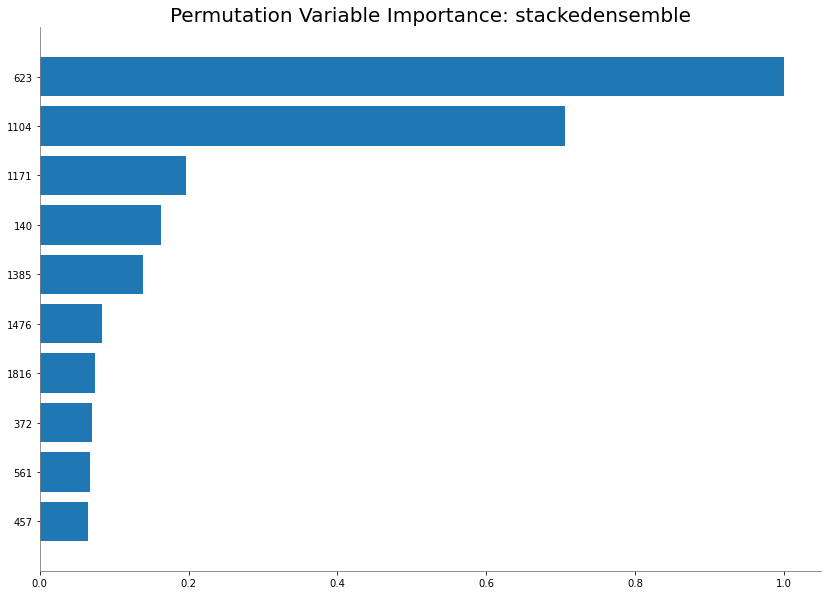


Variable Importances: 


,Variable,Relative Importance,Scaled Importance,Percentage
0,623,0.000463,1.000000,0.157770
1,1104,0.000327,0.706492,0.111463
2,1171,0.000091,0.196967,0.031075
3,140,0.000076,0.163677,0.025823
4,1385,0.000064,0.138802,0.021899
5,1476,0.000039,0.083965,0.013247
6,1816,0.000034,0.073978,0.011672
7,372,0.000032,0.070187,0.011073
8,561,0.000031,0.067135,0.010592
9,457,0.000030,0.065286,0.010300



See the whole table with table.as_data_frame()


In [15]:
aml.leader.permutation_importance_plot(df)